In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random 
get_ipython().run_line_magic("matplotlib","inline")


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)
len(x_test)
x_train.shape
x_test.shape
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

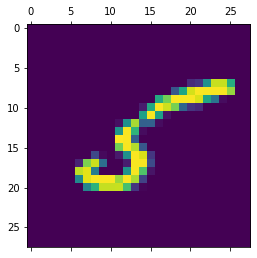

In [ ]:
plt.matshow(x_train[11]) #we can change it by changing the argument 

In [ ]:
x_train = x_train/255
x_test = x_test/255


In [ ]:
x_train[11]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6398 - accuracy: 0.8397 - val_loss: 0.3573 - val_accuracy: 0.9033
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3395 - accuracy: 0.9053 - val_loss: 0.2941 - val_accuracy: 0.9201
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.9176 - val_loss: 0.2629 - val_accuracy: 0.9271
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2624 - accuracy: 0.9263 - val_loss: 0.2432 - val_accuracy: 0.9347
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2405 - accuracy: 0.9332 - val_loss: 0.2238 - val_accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2224 - accuracy: 0.9380 - val_loss: 0.2098 - val_accuracy: 0.9401
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2069 - accuracy: 0.9422 - val_loss: 0.1969 - val_accuracy:

In [ ]:
test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.1664 - accuracy: 0.9522
Loss=0.166
Accuracy=0.952


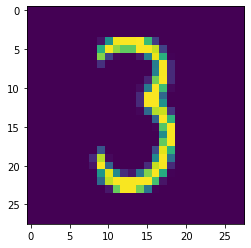

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()


In [ ]:
predicted_value=model.predict(x_test[n])
print("Handwritten nuber in the image is= %d" %np.argmax(predicted_value))


313/313 [==============================] - 0s 2ms/step
Handwritten nuber in the image is= 61140


In [ ]:
get_ipython().run_line_magic('pinfo2','history.history')
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

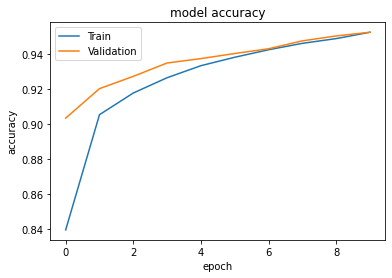

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


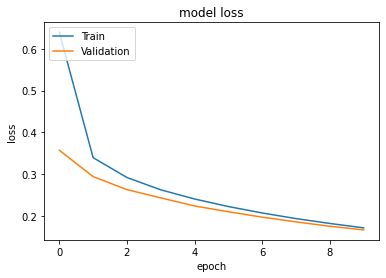

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


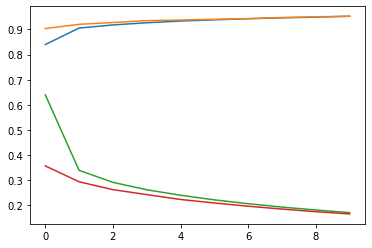

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


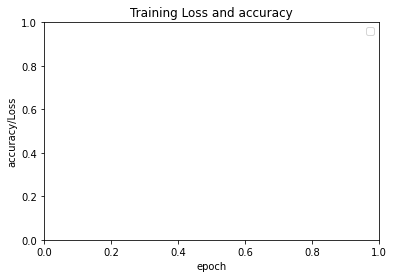

In [ ]:
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()


In [ ]:
keras_model_path="/content/sample_data"
model.save(keras_model_path)


In [ ]:
restored_keras_model = tf.keras.models.load_model(keras_model_path)